# perceptron means single layered neural network

In [3]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

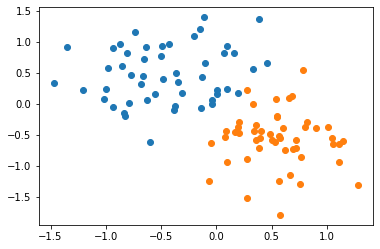

In [5]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])




In [14]:
X_data = torch.tensor(X).float()
y_data = torch.tensor(y).float()
print(y_data.shape)
y_data = torch.tensor(y.reshape(100,1)).float()

torch.Size([100])


In [15]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=output_size)
    
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    

In [16]:
model = Model(2,1)
w, b = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]

def get_params():
    return (w1.item(), w2.item(), b1.item()) # .item yaparak tensor to integer


In [17]:
def plot_fit(title):
    plt.title(title)
    w1, w2, b = get_params()
    
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b) / -w2

    plt.plot(x1, x2, 'r')
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

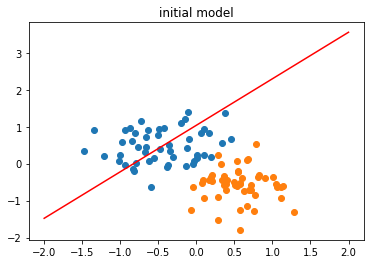

In [18]:
plot_fit("initial model")

In [19]:
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01) # start backward prop

In [20]:
epochs = 3000
losses = []

for i in range(epochs):
    y_pred = model.forward(X_data)
    loss = loss_func(y_pred, y_data)
    
    losses.append(loss)
    
    if i % 100 == 0:
        print(f"Epoch: {i}, loss: {loss.item()}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, loss: 0.5348054766654968
Epoch: 100, loss: 0.466196745634079
Epoch: 200, loss: 0.41509953141212463
Epoch: 300, loss: 0.3759543299674988
Epoch: 400, loss: 0.3451280891895294
Epoch: 500, loss: 0.3202468752861023
Epoch: 600, loss: 0.299731582403183
Epoch: 700, loss: 0.2825058698654175
Epoch: 800, loss: 0.267816424369812
Epoch: 900, loss: 0.2551226317882538
Epoch: 1000, loss: 0.2440277487039566
Epoch: 1100, loss: 0.23423419892787933
Epoch: 1200, loss: 0.22551456093788147
Epoch: 1300, loss: 0.21769212186336517
Epoch: 1400, loss: 0.210627481341362
Epoch: 1500, loss: 0.20420925319194794
Epoch: 1600, loss: 0.19834701716899872
Epoch: 1700, loss: 0.19296693801879883
Epoch: 1800, loss: 0.1880079209804535
Epoch: 1900, loss: 0.18341894447803497
Epoch: 2000, loss: 0.17915712296962738
Epoch: 2100, loss: 0.1751861423254013
Epoch: 2200, loss: 0.17147499322891235
Epoch: 2300, loss: 0.16799701750278473
Epoch: 2400, loss: 0.16472892463207245
Epoch: 2500, loss: 0.16165107488632202
Epoch: 2600, lo

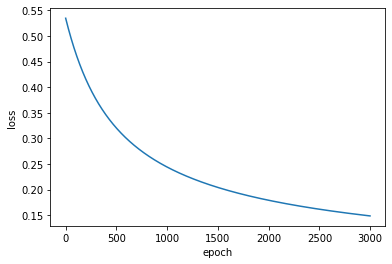

In [21]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(range(epochs),losses)

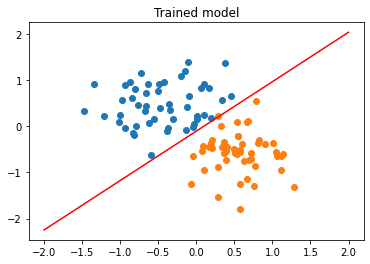

In [22]:
plot_fit("Trained model")